In [121]:
import sys
sys.path.append('../src')

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [257]:
data = pd.read_csv('../data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [258]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**id**: Unique ID for each home sold 

**date**: Date of the home sale  

**price**: Price of each home sold  

**bedrooms**: Number of bedrooms  

**bathrooms**: Number of bathrooms, where .5 accounts for a room with a toilet but no shower  

**sqft_living**: Square footage of the apartments interior living space  

**sqft_lot**: Square footage of the land space  

**floors**: Number of floors  

**waterfront**: A dummy variable for whether the apartment was overlooking the waterfront or not 

**view**: An index from 0 to 4 of how good the view of the property was  

**condition**: An index from 1 to 5 on the condition of the apartment  

**grade**: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design  

**sqft_above**: The square footage of the interior housing space that is above ground level  

**sqft_basement**: The square footage of the interior housing space that is below ground level  

**yr_built**: The year the house was initially built  

**yr_renovated**: The year of the house’s last renovation  

**zipcode**: What zipcode area the house is in  

**lat**: Lattitude  

**long**: Longitude  

**sqft_living15**: The square footage of interior housing living space for the nearest 15 neighbors  

**sqft_lot15**: The square footage of the land lots of the nearest 15 neighbors  *

In [259]:
data['date'] = pd.to_datetime(data['date'])

In [260]:
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [261]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

In [262]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year', 'day'],
      dtype='object')

In [263]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


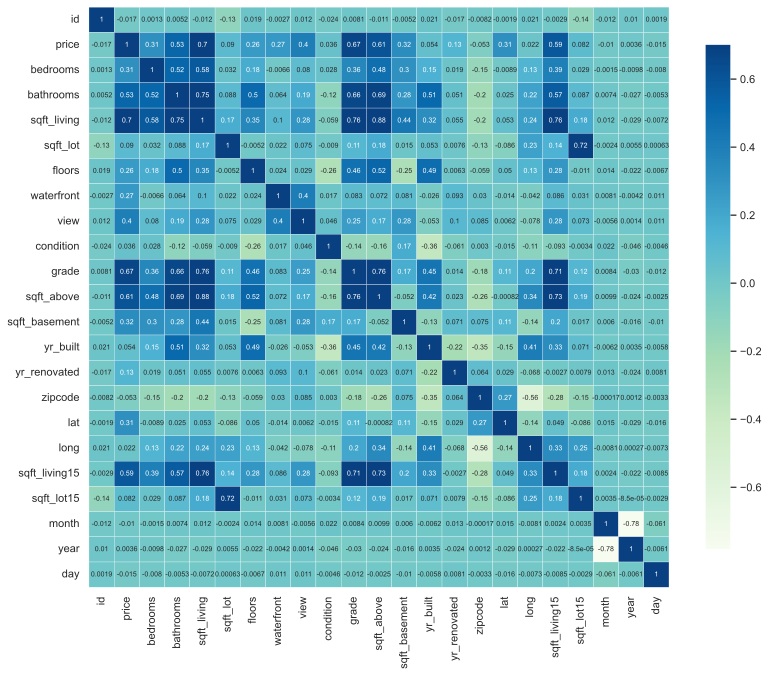

In [264]:
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})
plt.show()

In [265]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day             -0.014670
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [248]:
y = data['price'].values
data = data.drop(['price'], axis=1)

In [266]:
from sklearn.model_selection import train_test_split


data_train, data_val, y_train, y_val = train_test_split(data, y, shuffle=True, test_size=0.3)

In [267]:
print(data_train.shape)
print(data_val.shape)

(15129, 24)
(6484, 24)


In [249]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'year', 'month']  

categorical_features = ['view', 'zipcode']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_features),
    ('scaler', SimpleImputer(), numeric_features)
])

X_train = column_transformer.fit_transform(data_train)
X_val = column_transformer.transform(data_val)
print(X_train.shape)
print(X_val.shape)

(15129, 97)
(6484, 97)


In [307]:
import numpy as np
 
data = np.genfromtxt("input.csv", delimiter=',', dtype=np.int64)
data = np.std(data, axis=1)
ans = 2 if sum(data > 4) > sum(data <= 4) else 1
with open("output.txt", "w") as o:
    print(ans, end='', file=o)

In [250]:
from ensembles import RandomForestMSE, GradientBoostingMSE

# Поведение в зависимости от количества деревьев

## случайный лес

In [253]:
modelRF = RandomForestMSE(n_estimators=1000)
rmse_train11, rmse_val11, time11 = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)

In [254]:
np.min(rmse_val11), np.argmin(rmse_val11)

(126174.23021857148, 302)

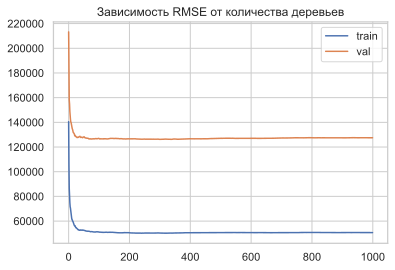

In [255]:
plt.figure(figsize=(6,4))
plt.title('Зависимость RMSE от количества деревьев', fontsize=12)
plt.plot(rmse_train11, label='train')
plt.plot(rmse_val11, label='val')
plt.grid(True)
plt.legend()
plt.show()

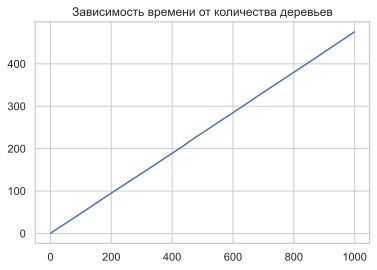

In [256]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени от количества деревьев', fontsize=12)
plt.plot(time11)
plt.grid(True)
plt.show()

## градиентный бустинг

In [63]:
modelGB = GradientBoostingMSE(n_estimators=1000)
rmse_train12, rmse_val12, time12 = modelGB.fit(X_train, y_train, X_val, y_val, trace=True)

In [64]:
np.min(rmse_val12), np.argmin(rmse_val12)

(117043.59138019333, 999)

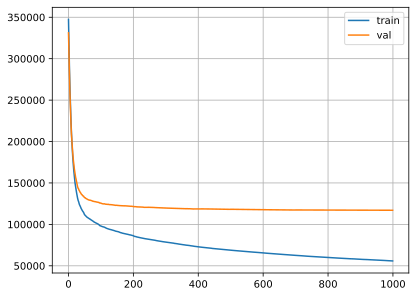

In [65]:
plt.figure(figsize=(6,4))
plt.title('Зависимость RMSE от количества деревьев', fontsize=12)
plt.plot(rmse_train12, label='train')
plt.plot(rmse_val12, label='val')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени от количества деревьев', fontsize=12)
plt.plot(time12)
plt.grid(True)
plt.show()

# Исследование поведения в зависимости от размерности подвыборки признаков для одного дерева

## случайный лес

In [67]:
feature_subsample_size = [3, 6, 9, 12, 15, 18]
rmse_train21, rmse_val21, time21 = [], [], []
for i in feature_subsample_size:
    modelRF = RandomForestMSE(n_estimators=1000, feature_subsample_size=i)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train21.append(rmse_t)
    rmse_val21.append(rmse_v)
    time21.append(time)

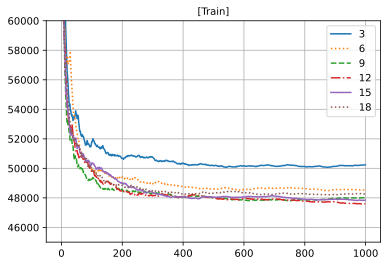

In [75]:
plt.figure(figsize=(6,4))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различных размерностей подвыборки признаков', fontsize=12)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_train21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.ylim((45000, 60000))
plt.legend(fontsize=10)
plt.show()

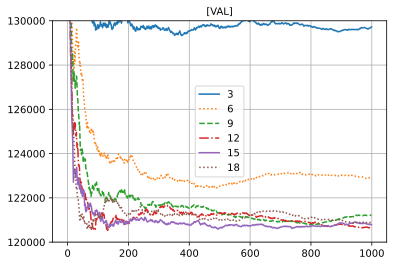

In [77]:
plt.figure(figsize=(6,4))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различных размерностей подвыборки признаков', fontsize=12)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_val21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.ylim((120000, 130000))
plt.legend(fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени для различных размерностей подвыборки признаков', fontsize=12)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(time21[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.legend(fontsize=10)
plt.show()

## градиентный бустинг

In [78]:
feature_subsample_size = [3, 6, 9, 12, 15, 18]
rmse_train22, rmse_val22, time22 = [], [], []
for i in feature_subsample_size:
    modelGB = GradientBoostingMSE(n_estimators=1000, feature_subsample_size=i)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train22.append(rmse_t)
    rmse_val22.append(rmse_v)
    time22.append(time)

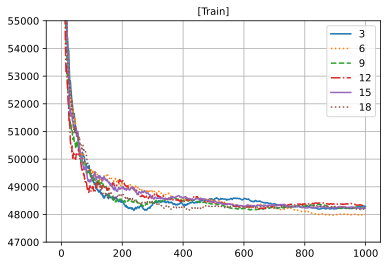

In [83]:
plt.figure(figsize=(6,4))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различных размерностей подвыборки признаков', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_train22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.ylim((47000, 55000))
plt.legend(fontsize=10)
plt.show()

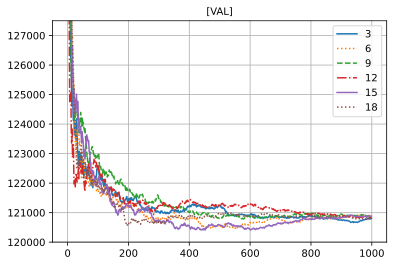

In [84]:
plt.figure(figsize=(6,4))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различных размерностей подвыборки признаков', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_val22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.ylim((120000, 127500))
plt.legend(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени для различных размерностей подвыборки признаков', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(time22[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.legend(fontsize=10)
plt.show()

# Исследование поведения в зависимости от максимальной глубины дерева

## случайный лес

In [85]:
max_depth = [None, 2, 5, 8, 11, 14]
rmse_train31, rmse_val31, time31 = [], []
for i in max_depth:
    modelRF = RandomForestMSE(n_estimators=1000, max_depth=i)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train31.append(rmse_t)
    rmse_val31.append(rmse_v)
    time31.append(time)

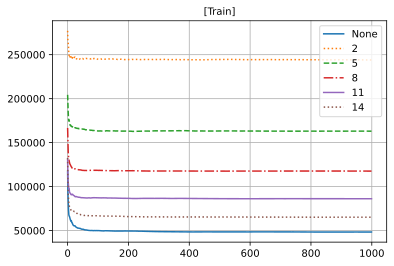

In [87]:
plt.figure(figsize=(6,4))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_train31[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid()
# plt.ylim((45000, 60000))
plt.legend(fontsize=10)
plt.show()

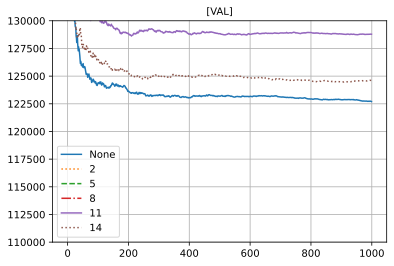

In [88]:
plt.figure(figsize=(6,4))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_val31[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid()
plt.ylim((110000, 130000))
plt.legend(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(time31[i], linestyle=linestyle_str[i%4], label=str(feature_subsample_size[i]))
plt.grid()
plt.legend(fontsize=10)
plt.show()

## градиентный бустинг

In [89]:
max_depth = [None, 2, 5, 8, 11, 14]
rmse_train32, rmse_val32, time32 = [], []
for i in max_depth:
    modelRF = GradientBoostingMSE(n_estimators=1000, max_depth=i)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train32.append(rmse_t)
    rmse_val32.append(rmse_v)
    time32.append(time)

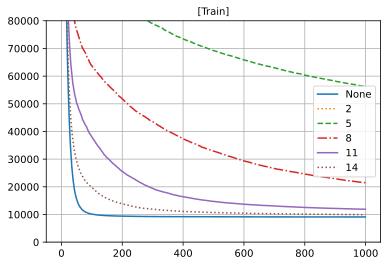

In [94]:
plt.figure(figsize=(6,4))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_train32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid()
plt.ylim((0000, 80000))
plt.legend(fontsize=10)
plt.show()

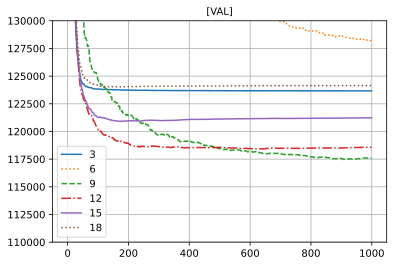

In [95]:
plt.figure(figsize=(6,4))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(rmse_val32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid()
plt.ylim((110000, 130000))
plt.legend(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени от количества деревьев\n для различной глубины дерева', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(time32[i], linestyle=linestyle_str[i%4], label=str(max_depth[i]))
plt.grid()
plt.legend(fontsize=10)
plt.show()

# Исследование поведения градиентного бустинга в зависимости от выбранного $learning\_rate$

In [ ]:
lr = [0.001, 0.01, 0.1, 1]
rmse_train4, rmse_val4, time4 = [], []
for i in lr:
    modelRF = GradientBoostingMSE(n_estimators=1000, learning_rate=i)
    rmse_t, rmse_v, time = modelRF.fit(X_train, y_train, X_val, y_val, trace=True)
    rmse_train4.append(rmse_t)
    rmse_val4.append(rmse_v)
    time4.append(time)

In [ ]:
plt.figure(figsize=(6,4))
plt.title('[Train] Зависимость RMSE от количества деревьев\n для различного learning\_rate$', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_train4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.grid()
plt.ylim((0000, 80000))
plt.legend(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('[VAL] Зависимость RMSE от количества деревьев\n для различного learning\_rate$', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(4):
    plt.plot(rmse_val4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.grid()
plt.ylim((110000, 130000))
plt.legend(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Зависимость времени от количества деревьев\n для различного learning\_rate$', fontsize=10)

linestyle_str = ['solid','dotted', 'dashed', 'dashdot'] 
for i in range(6):
    plt.plot(time4[i], linestyle=linestyle_str[i%4], label=str(lr[i]))
plt.grid()
plt.legend(fontsize=10)
plt.show()